# Problem Set 4
## Fundamentals of Simulation Methods, WiSe 20/21

#### Author:    Elias Olofsson

#### Version information:
        2020-12-02: v.1.0. First public release. 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

## Exercise 1 - The 2-body problem: Orbit of planet around the Sun (8 pts)

In [2]:
# Constants
M_solar = 1.99  * 10**30    # Solar mass                (kg)
AU      = 1.496 * 10**11    # Astronomical unit         (m)
AU_v    = 2.98  * 10**4     # Kepler velocity           (m/s)    
G       = 6.674 * 10**-11   # Gravitational constant    (m^3*kg^-1*s^-2)

# System parameters
M_s = M_solar*1                         # Mass of star
M_p = M_solar*10**-3                    # Mass of planet

# Initial conditions
x_p_init = np.array([1,0,0])*AU         # Planet position
v_p_init = np.array([0,0.5,0])*AU_v     # Planet velocity

x_s_init = np.array([0,0,0])*AU         # Star position
v_s_init = np.array([0,0,0])*AU_v       # Star velocity

In [3]:
# Vector-valued function from our ODE (Hardcoded for 2 bodies, only affected by gravity)
def f(x):
    r = np.linalg.norm(x[0,:]-x[1,:])
    v_next = np.zeros_like(x)
    v_next[0,:] = G*M_s*(x[1,:]-x[0,:])/r**3
    v_next[1,:] = G*M_p*(x[0,:]-x[1,:])/r**3
    return v_next

#### Integration using the leapfrog algorithm

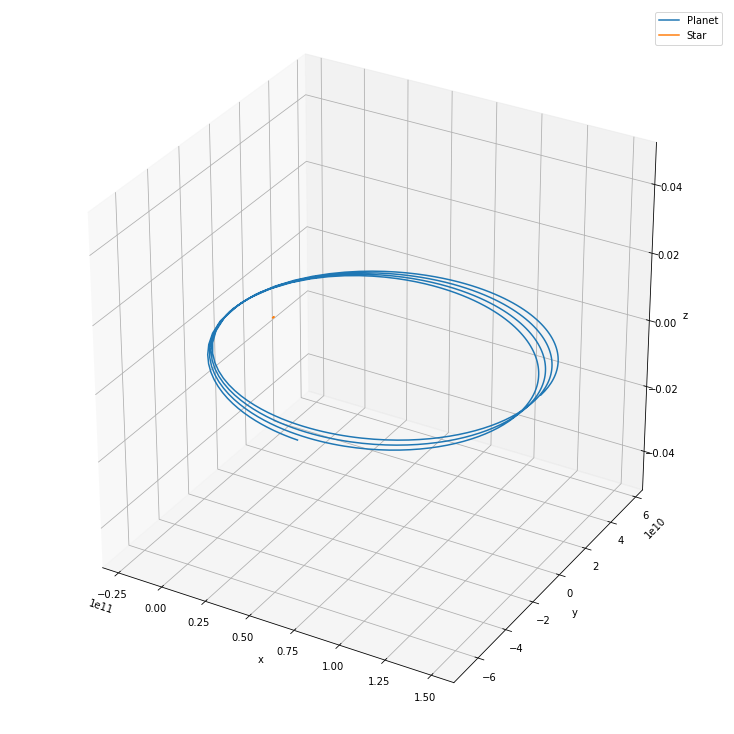

In [4]:
# Simulation settings
dt = 10**5          # Stepsize               (s)  [10^5 stable, 10^6 unstable]
T = 5*10**7         # Total integration time (s)

N = round(T/dt)     # No. of timesteps

N_bodies = 2        # No. of bodies
dimensions = 3      # No. of dimensions

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init


# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f(x[i])        # Halfstep in v.
    x[i+1] = x[i] + dt*v_half           # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f(x[i+1])    # Step in v, using halfstep in v and next step in x.

# Plotting
fig = plt.figure(figsize=(10,10))
ax = Axes3D(fig)
ax.plot(x[:,0,0], x[:,0,1], x[:,0,2],label='Planet')
ax.plot(x[:,1,0], x[:,1,1], x[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
plt.legend()
plt.show()

#### Plotting the first 100 orbits, using the leapfrog algorithm, Runge Kutta 2nd and 4th order.

In [5]:
# Simulation settings
dt = 6*10**4        # Stepsize               (s)  [10^5 unstable for RK2, 5*10^4 stable]
T = 1.5*10**9       # Total integration time (s)  [T =~ 1.5*10^7 for 1 orbit => T =~ 1.5*10^9 for 100 orbits]

N = round(T/dt)     # No. of timesteps

N_bodies = 2        # No. of bodies
dimensions = 3      # No. of dimensions

# Time vector, for later plotting
t = np.arange(0,T,dt)

# -------------------------------------------------------------
# Leapfrog

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init

# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f(x[i])        # Halfstep in v.
    x[i+1] = x[i] + dt*v_half           # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f(x[i+1])    # Step in v, using halfstep in v and next step in x.

# Save result for later comparison.
x_leapfrog = x
v_leapfrog = v

# -------------------------------------------------------------
# RK2

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init

# RK2 integration
for i in range(N-1):
    k1_x = v[i] 
    k1_v = f(x[i])
    
    k2_x = v[i]+dt*k1_v
    k2_v = f(x[i]+dt*k1_x)

    x[i+1] = x[i] + dt*(k1_x+k2_x)/2
    v[i+1] = v[i] + dt*(k1_v+k2_v)/2

# Save result for later comparison.
x_RK2 = x
v_RK2 = v

# -------------------------------------------------------------
# RK4

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert initial values.
x[0,:,:] =  x_p_init, x_s_init
v[0,:,:] =  v_p_init, v_s_init

# RK4 integration
for i in range(N-1):
    k1_x = v[i] 
    k1_v = f(x[i])
    
    k2_x = v[i]+dt/2*k1_v
    k2_v = f(x[i]+dt/2*k1_x)

    k3_x = v[i]+dt/2*k2_v
    k3_v = f(x[i]+dt/2*k2_x)

    k4_x = v[i]+dt*k3_v
    k4_v = f(x[i]+dt*k3_x)

    x[i+1] = x[i] + dt*(k1_x/6+k2_x/3+k3_x/3+k4_x/6)
    v[i+1] = v[i] + dt*(k1_v/6+k2_v/3+k3_v/3+k4_v/6)

# Save result for later comparison.
x_RK4 = x
v_RK4 = v

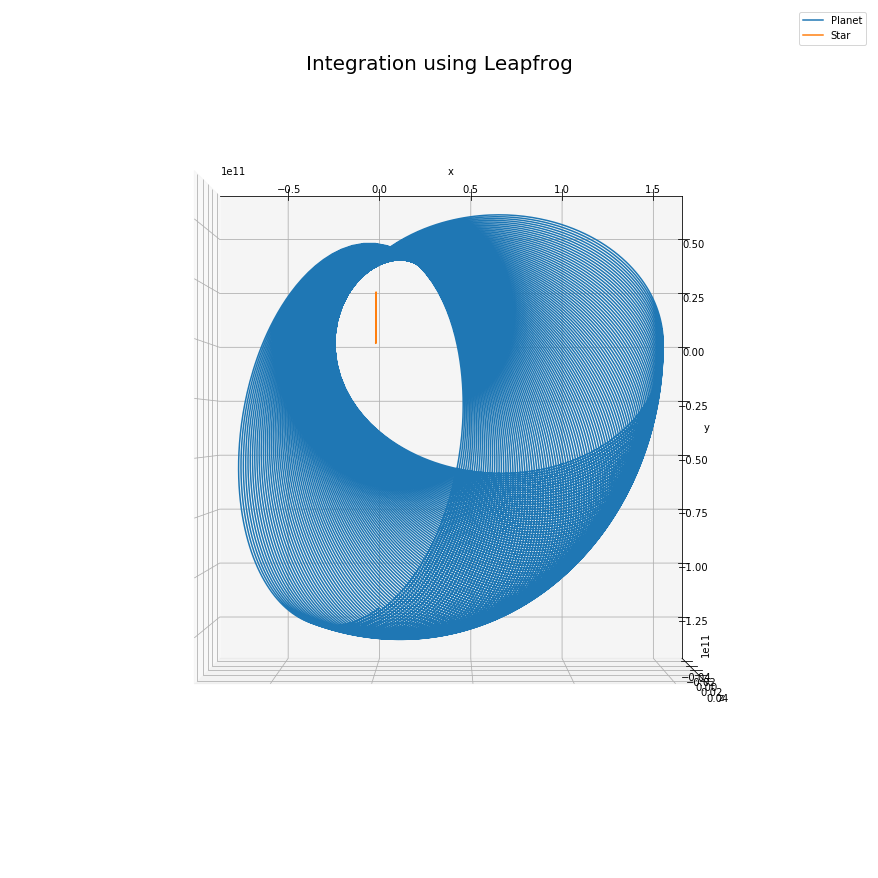

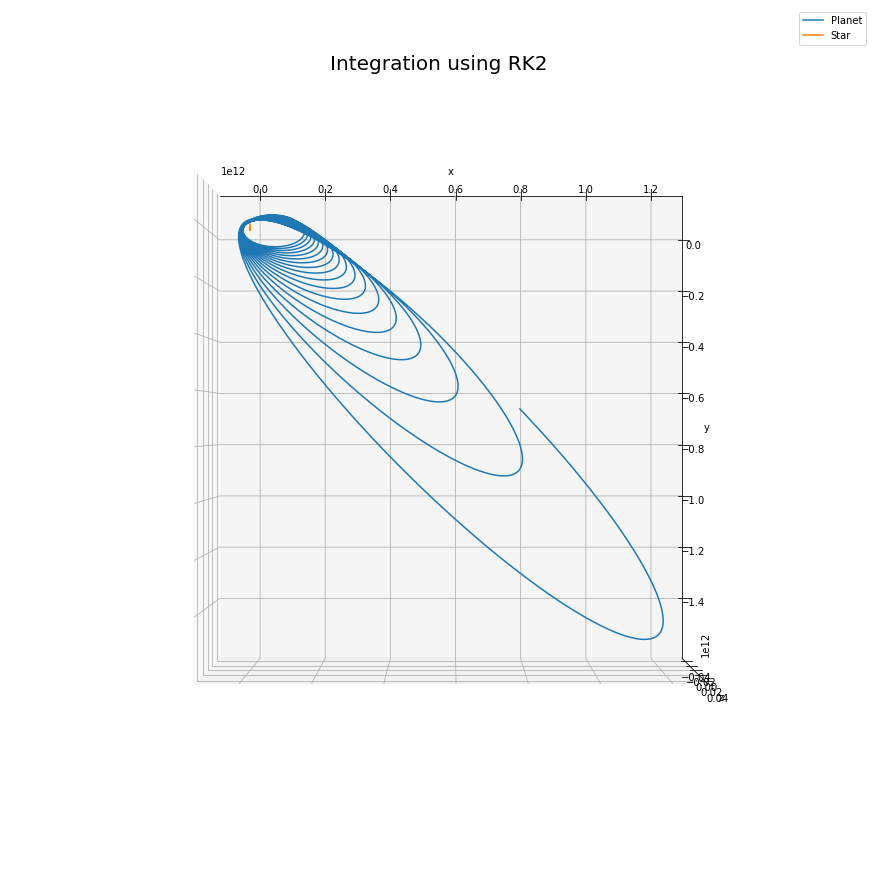

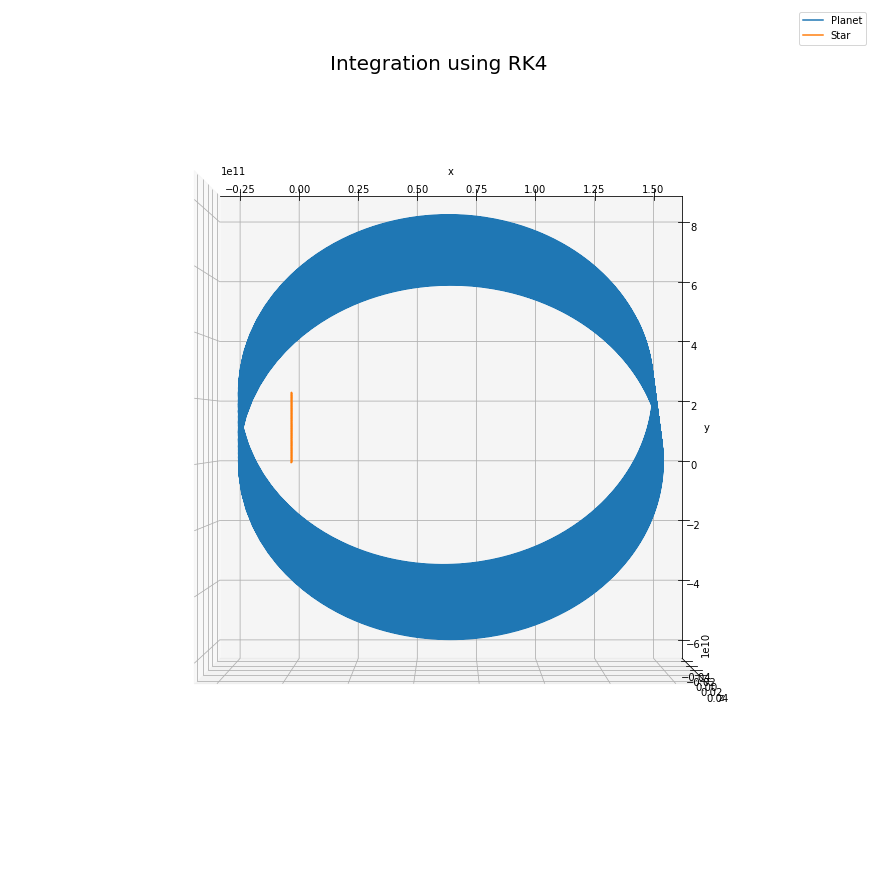

In [6]:
# Figure size and perspective control
fsize = (12,12)     
elevation = 90
azimuth = -90

# -------------------------------------------------------------
# Plotting leapfrog
fig = plt.figure(figsize=fsize)
ax = Axes3D(fig)
ax.plot(x_leapfrog[:,0,0], x_leapfrog[:,0,1], x_leapfrog[:,0,2],label='Planet')
ax.plot(x_leapfrog[:,1,0], x_leapfrog[:,1,1], x_leapfrog[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Integration using Leapfrog', size=20)
ax.view_init(elev=elevation, azim=azimuth)
plt.legend()
fig.tight_layout()
#plt.show()

# -------------------------------------------------------------
# Plotting RK2
fig = plt.figure(figsize=fsize)
ax = Axes3D(fig)
ax.plot(x_RK2[:,0,0], x_RK2[:,0,1], x_RK2[:,0,2],label='Planet')
ax.plot(x_RK2[:,1,0], x_RK2[:,1,1], x_RK2[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Integration using RK2', size=20)
ax.view_init(elev=elevation, azim=azimuth)
plt.legend()
fig.tight_layout()
#plt.show()

# -------------------------------------------------------------
# Plotting RK4
fig = plt.figure(figsize=fsize)
ax = Axes3D(fig)
ax.plot(x_RK4[:,0,0], x_RK4[:,0,1], x_RK4[:,0,2],label='Planet')
ax.plot(x_RK4[:,1,0], x_RK4[:,1,1], x_RK4[:,1,2],label='Star')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title('Integration using RK4', size=20)
ax.view_init(elev=elevation, azim=azimuth)
plt.legend()
fig.tight_layout()
#plt.show()

#### Time evolution of relative error of the total energy and time evolution of total kinetic energy of the system.

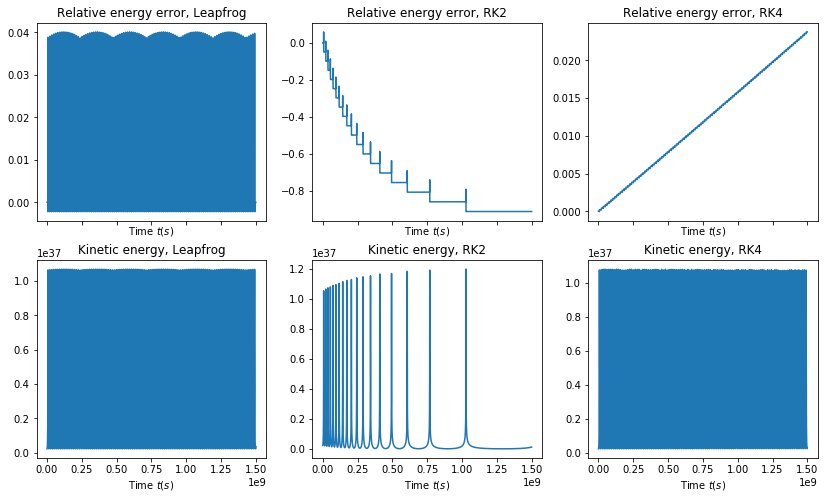

In [7]:
# Kinetic energies
Ek_leapfrog = 0.5*np.sum(np.array([M_p, M_s])*np.sum(v_leapfrog**2, axis=2), axis=1) 
Ek_RK2      = 0.5*np.sum(np.array([M_p, M_s])*np.sum(v_RK2**2     , axis=2), axis=1)
Ek_RK4      = 0.5*np.sum(np.array([M_p, M_s])*np.sum(v_RK4**2     , axis=2), axis=1)

# Potential energies
Ep_leapfrog = -G*M_p*M_s/np.linalg.norm(x_leapfrog[:,0]-x_leapfrog[:,1], axis=1)
Ep_RK2      = -G*M_p*M_s/np.linalg.norm(x_RK2[:,0]-x_RK2[:,1]          , axis=1)
Ep_RK4      = -G*M_p*M_s/np.linalg.norm(x_RK4[:,0]-x_RK4[:,1]          , axis=1)

# Total energies
E_leapfrog = Ek_leapfrog + Ep_leapfrog
E_RK2      = Ek_RK2 + Ep_RK2
E_RK4      = Ek_RK4 + Ep_RK4

# Relative error of the total energies
E_rel_leapfrog = (E_leapfrog - E_leapfrog[0])/E_leapfrog[0]
E_rel_RK2      = (E_RK2 - E_RK2[0])/E_RK2[0]
E_rel_RK4      = (E_RK4 - E_RK4[0])/E_RK4[0]

# Plotting
fig, axes = plt.subplots(2, 3, figsize=(14, 8), sharex=True)

axes[0,0].plot(t,E_rel_leapfrog)
axes[0,0].set_title('Relative energy error, Leapfrog')
axes[0,0].set_xlabel('Time $t(s)$')

axes[0,1].plot(t,E_rel_RK2)
axes[0,1].set_title('Relative energy error, RK2')
axes[0,1].set_xlabel('Time $t(s)$')

axes[0,2].plot(t,E_rel_RK4)
axes[0,2].set_title('Relative energy error, RK4')
axes[0,2].set_xlabel('Time $t(s)$')

axes[1,0].plot(t,Ek_leapfrog)
axes[1,0].set_title('Kinetic energy, Leapfrog')
axes[1,0].set_xlabel('Time $t(s)$')

axes[1,1].plot(t,Ek_RK2)
axes[1,1].set_title('Kinetic energy, RK2')
axes[1,1].set_xlabel('Time $t(s)$')

axes[1,2].plot(t,Ek_RK4)
axes[1,2].set_title('Kinetic energy, RK4')
axes[1,2].set_xlabel('Time $t(s)$')
fig.show()

## Exercise 2 - N-body problem (12 pts)

In [8]:
def f_nbody(x,m,eps):
    diff = x[:,None]-x                     # (N,N,3)    (k,i,d)
    r = np.linalg.norm(diff, axis=2)       # (N,N)      (k,i)     (symmetric matrix)
    inv = (r**3 + eps**3)**-1              # (N,N)      (k,i)    
    v_next = np.dot((diff*inv[:,:,None]).transpose(1,2,0), m)
    return v_next

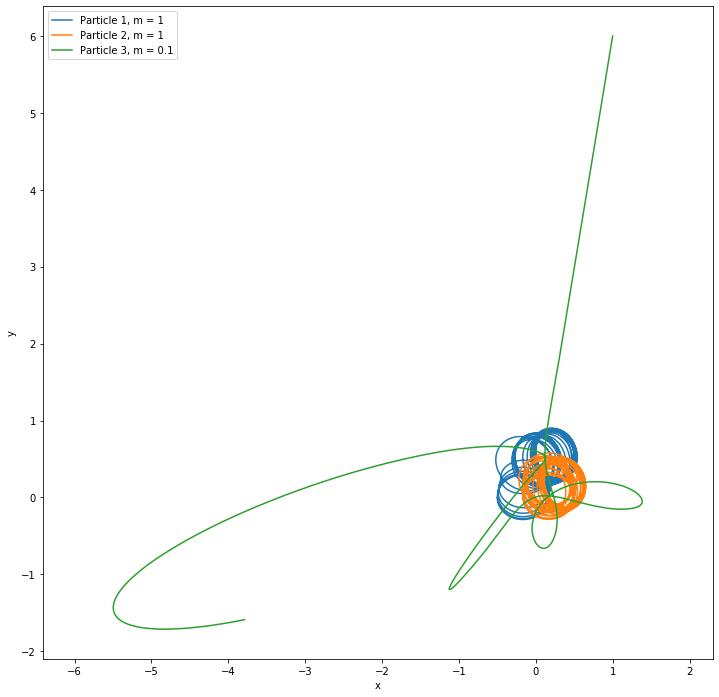

In [9]:
# System settings
N_bodies = 3                        # No. of particles
dimensions = 3                      # No. of dimensions
m = np.ones(N_bodies)               # Masses of the bodies
m[2] = 0.1

# Initial values
x_init = np.array([[-0.5,0,0],[0.5,0,0],[1,6,2]])
v_init = np.array([[0,-0.5,0],[0,0.5,0],[0,0,0]])

# Simulation setttings
dt = 0.001                            # Timestep size             
T = 60                              # Total integration time    
L = 1                               # Typical length of system  

eps = L*N_bodies**(-1/3)*10**-4     # Softening length parameter
N = round(T/dt)                     # Number of timesteps

# Preallocations.
x = np.zeros((N,N_bodies,dimensions))
v = np.zeros((N,N_bodies,dimensions))

# Insert the initial values.
x[0,:,:] =  x_init
v[0,:,:] =  v_init

# Leapfrog integration
for i in range(N-1):
    v_half = v[i] + dt/2*f_nbody(x[i], m, eps)        # Halfstep in v.
    x[i+1] = x[i] + dt*v_half                   # Step in x, using halfstep in v.
    v[i+1] = v_half + dt/2*f_nbody(x[i+1], m, eps)    # Step in v, using halfstep in v and next step in x.

# Plotting
fig = plt.figure(figsize=(12,12))
plt.plot(x[:,0,0], x[:,0,1],label='Particle 1, m = 1')
plt.plot(x[:,1,0], x[:,1,1],label='Particle 2, m = 1')
plt.plot(x[:,2,0], x[:,2,1],label=f'Particle 3, m = {m[2]}')
plt.xlabel('x')
plt.ylabel('y')
plt.axes().set_aspect('equal', 'datalim')
plt.legend()
plt.show()

